In [3]:
from collections import Counter

import pandas as pd
import torch
from kge.job.eval import EvaluationJob
from kge.model import KgeModel
from kge.util.io import load_checkpoint
from functools import reduce

PATH = "/work/dhuynh/Workspaces/Thesis/kge/local/experiments/error_analysis"

checkpoint = load_checkpoint(f'{PATH}/best_models/ICLR20/ComplEx/FB237/Hybrid_hybrid/checkpoint_best.pt')
model = KgeModel.create_from(checkpoint)

# load data
model.dataset.relation_strings(torch.Tensor([1,]).long())
model.dataset.entity_strings(torch.Tensor([1,]).long())

relation_embedder = model.get_p_embedder()
meta_relation = model.dataset._meta['relation_strings']
meta_entity = model.dataset._meta['entity_strings']

Loading configuration of dataset fb15k-237 from /work/dhuynh/Workspaces/Thesis/kge/data/fb15k-237 ...
Loaded 237 keys from map relation_strings
Loaded 14541 keys from map entity_ids
Loaded 14541 keys from map entity_strings


In [4]:
import pandas as pd

df_ranking_training = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_hybrid_error_analysis_ranking_train.csv')
df_ranking_training['eval_type'] = 'train'
relation_type = df_ranking_training[['name_relation', 'relation_type']].drop_duplicates().set_index('name_relation').to_dict()['relation_type']

df_metric_training = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_hybrid_error_analysis_metric_train.csv')
df_metric_training['eval_type'] = 'train'
df_metric_training = df_metric_training.rename(columns={'relation': 'name_relation'})

df_ranking_training = df_ranking_training.merge(df_metric_training[['name_relation', 
                                                                    'mean_reciprocal_rank_filtered_with_test_relation_standard',
                                                                    'mean_reciprocal_rank_filtered_with_test_relation_hybrid']]\
                                                        .rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_standard': 'MRR_standard',
                                                                        'mean_reciprocal_rank_filtered_with_test_relation_hybrid': 'MRR_hybrid'}),
                                                on='name_relation', how='left')

df_ranking_training.head(2)

,id,name_subjects,name_relation,name_objects,relation_type,triplet,po_to_s_hybrid,po_to_s_standard,predicted_object_hybrid,predicted_object_scores_hybrid,...,predicted_subject_score_hybrid,predicted_subject_score_standard,predicted_subject_standard,so_to_p_hybrid,so_to_p_standard,sp_to_o_hybrid,sp_to_o_standard,eval_type,MRR_standard,MRR_hybrid
0,0,Dominican Republic,/location/country/form_of_government,Republic,M-N,Dominican Republic | /location/country/form_of...,0,0,['Republic' 'Democracy' 'Presidential system' ...,"[11.245938301086426, 10.739019393920898, 9.936...",...,"[11.99709701538086, 11.907685279846191, 11.883...","[12.472025871276855, 12.343207359313965, 12.24...",['Zambia' 'Guinea-Bissau' 'Congo' 'Djibouti' '...,0,0,0,0,train,1.000000,1.0
1,1,Mighty Morphin Power Rangers,/tv/tv_program/regular_cast./tv/regular_tv_app...,Wendee Lee,1-N,Mighty Morphin Power Rangers | /tv/tv_program/...,0,0,['Johnny Yong Bosch' 'Wendee Lee' 'Jeff Bennet...,"[15.297163009643555, 14.774636268615723, 9.455...",...,"[14.774637222290039, 10.309414863586426, 9.181...","[14.661572456359863, 11.222408294677734, 10.83...",['Mighty Morphin Power Rangers' 'Ben 10' 'Kid ...,0,0,0,0,train,0.913981,1.0


In [5]:
df_ranking_validation = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_hybrid_error_analysis_ranking_valid.csv')
df_ranking_validation['eval_type'] = 'valid'
df_ranking_validation.head(2)

df_metric_validation = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_hybrid_error_analysis_metric_valid.csv')
df_metric_validation['eval_type'] = 'valid'
df_metric_validation = df_metric_validation.rename(columns={'relation': 'name_relation'})

df_ranking_validation = df_ranking_validation.merge(df_metric_validation[['name_relation', 
                                                                          'mean_reciprocal_rank_filtered_with_test_relation_standard',
                                                                          'mean_reciprocal_rank_filtered_with_test_relation_hybrid']]\
                                                                  .rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_standard': 'MRR_standard',
                                                                                  'mean_reciprocal_rank_filtered_with_test_relation_hybrid': 'MRR_hybrid'}),
                                                          on='name_relation', how='left')

df_ranking_validation.head(2)

,id,name_subjects,name_relation,name_objects,relation_type,triplet,po_to_s_hybrid,po_to_s_standard,predicted_object_hybrid,predicted_object_scores_hybrid,...,predicted_subject_score_hybrid,predicted_subject_score_standard,predicted_subject_standard,so_to_p_hybrid,so_to_p_standard,sp_to_o_hybrid,sp_to_o_standard,eval_type,MRR_standard,MRR_hybrid
0,0,American Pie,/film/film/genre,Romance Film,M-N,American Pie | /film/film/genre | Romance Film,75,237,['Comedy' 'Drama (Film genre) #99' 'Romance Fi...,"[9.811301231384277, 9.581463813781738, 9.44480...",...,"[11.474705696105957, 11.343169212341309, 11.33...","[11.361373901367188, 11.339797973632812, 11.27...",['The Last Song' 'Gigi' 'Shopgirl' 'The Mirror...,0,0,1,1,valid,0.990018,0.994335
1,1,St. Louis,/location/location/time_zones,Central Time Zone,M-1,St. Louis | /location/location/time_zones | Ce...,0,13,['Central Time Zone' 'Eastern Time Zone' 'Paci...,"[10.947417259216309, 10.43017864227295, 7.6015...",...,"[12.535480499267578, 12.519914627075195, 12.48...","[12.987507820129395, 12.84952449798584, 12.793...",['St. Cloud' 'Tarrant County' 'Norman' 'Bexar ...,0,0,0,1,valid,0.978036,1.000000


In [6]:
df_relation_similarity = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_error_analysis_relation_similarity.csv')
df_relation_similarity

,pair_relation,cosine_sim_standard_Hybrid,cosine_sim_standard_ER,cosine_sim_hybrid_Hybrid,cosine_sim_hybrid_ER
0,/american_football/football_team/current_roste...,-0.104892,0.092078,0.130913,-0.017204
1,/american_football/football_team/current_roste...,0.064897,0.023882,0.410136,0.098994
2,/american_football/football_team/current_roste...,0.014647,-0.013251,0.367712,0.103778
3,/american_football/football_team/current_roste...,-0.056359,0.055919,0.253017,0.137882
4,/american_football/football_team/current_roste...,0.024058,-0.025661,0.388793,0.186660
...,...,...,...,...,...
27961,/user/tsegaran/random/taxonomy_subject/entry./...,-0.005677,-0.072310,0.354967,0.080502
27962,/user/tsegaran/random/taxonomy_subject/entry./...,0.052820,-0.002278,0.236273,0.041826
27963,/user/tsegaran/random/taxonomy_subject/entry./...,-0.069270,-0.032342,0.119281,0.036081
27964,/user/tsegaran/random/taxonomy_subject/entry./...,0.030504,0.041609,0.289697,0.048771


In [7]:
import ast
df_similar_so = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_error_analysis_relations_in_similar_so_all.csv')
df_similar_so['name_relation'] = df_similar_so.name_relation.map(lambda x: ast.literal_eval(x))
df_similar_so.head(2)

,so_pair,name_relation,eval_type,relation_type,counts,is_similar,so_to_p_standard_Hybrid,so_to_p_standard_ER,so_to_p_hybrid_Hybrid,so_to_p_hybrid_ER,...,predicted_relation_hybrid_Hybrid,predicted_relation_hybrid_ER,euclidean_dist_standard_Hybrid,euclidean_dist_standard_ER,euclidean_dist_hybrid_Hybrid,euclidean_dist_hybrid_ER,cosine_sim_standard_Hybrid,cosine_sim_standard_ER,cosine_sim_hybrid_Hybrid,cosine_sim_hybrid_ER
0,"(500) Days of Summer, _ ,2009 Sundance Film Fe...","(/film/film/film_festivals, /film/film/release...",train,"('M-1', 'M-1')","(280, 262)",True,"(0, 0)","(2, 1)","(0, 0)","(0, 0)",...,/film/film/release_date_s./film/film_regional_...,/film/film/film_festivals,13.807630,3.476251,12.885740,10.733234,0.727376,0.525105,0.663774,0.627073
1,"(500) Days of Summer, _ ,United Kingdom",(/film/film/distributors./film/film_film_distr...,train,"('M-1', 'M-N')","(168, 14121)",False,"(0, 1)","(6, 12)","(0, 0)","(0, 0)",...,/film/film/release_date_s./film/film_regional_...,/film/film/release_date_s./film/film_regional_...,13.493464,4.926343,15.633004,15.075353,0.601617,0.199831,0.232598,0.229358


In [8]:
list_relation_in_so = list(set(sum(df_similar_so.name_relation.unique(), ())))
list_relation_in_so[:3]

['/organization/organization/place_founded',
 '/music/group_member/membership./music/group_membership/group',
 '/people/ethnicity/geographic_distribution']

In [9]:
import numpy as np
import ast
import re

def get_list_relation(relations):
    output = tuple(ast.literal_eval(re.sub(r"'\n '", "', '", re.sub(r"' '", "', '", relations))))
    if len(output) != 3 or output == None:
        print(relations)
        print(re.sub(r"'\n '", "', '", re.sub(r"' '", "', '", relations)))
        print(output)
        raise ValueError('wrong number of relations')
    return output

relation_type = df_ranking_training[['name_relation', 'relation_type']].drop_duplicates().set_index('name_relation').to_dict()['relation_type']

def get_relation_type(relations_tuple):
    output = []
    try:
        for rel in relations_tuple:
            output.append(relation_type[rel])
    except Exception:
        print('relations_tuple', relations_tuple)
        raise ValueError('wrong number of relations')
    return tuple(output)

subjects_objects_of_relations_train = {}
for relation in df_ranking_training.name_relation.unique():
    subjects_objects_of_relations_train[relation] = {
        'subjects': set(df_ranking_training[df_ranking_training.name_relation == relation].name_subjects),
        'objects': set(df_ranking_training[df_ranking_training.name_relation == relation].name_objects)
    }
    

def get_jaccard_sim(relation_pair, target):
    list_sets = []
    for rel in relation_pair:        
        list_sets.append(subjects_objects_of_relations_train[rel][target])
    def jaccard_similarity(set_1, set_2):
        return np.maximum(np.round(len(set_1.intersection(set_2)) / len(set_1.union(set_2)), 2), 0.00001)
    return jaccard_similarity(list_sets[0], list_sets[1])

def get_jaccard_sim_top3(row, origin, target):
    output = []
    relations = row[origin]
    name_relation = row.name_relation
    # print(df.head(2))
    for relation in relations:
        tmp = get_jaccard_sim((name_relation, relation), target)
        output.append(tmp)
    return tuple(output)

def harmonic_mean(x):
    return len(x) / sum(1 / i for i in x)


# Standard Model selected on hybrid MRR (Baseline model)

In [10]:
columns = ['name_subjects', 'name_relation', 'name_objects', 'relation_type', 'eval_type',
           'predicted_relation_hybrid', 'so_to_p_hybrid', 'MRR_hybrid',]
df_std_hybrid_ranking = pd.concat([df_ranking_training[columns].copy(), df_ranking_validation[columns].copy()])

df_std_hybrid_ranking['predicted_relation_hybrid'] = df_std_hybrid_ranking['predicted_relation_hybrid'].map(lambda x: get_list_relation(x))
df_std_hybrid_ranking['predicted_relation_type_hybrid'] = df_std_hybrid_ranking['predicted_relation_hybrid'].map(lambda x: get_relation_type(x))

df_std_hybrid_ranking.tail(2)

,name_subjects,name_relation,name_objects,relation_type,eval_type,predicted_relation_hybrid,so_to_p_hybrid,MRR_hybrid,predicted_relation_type_hybrid
17533,50/50,/film/film/release_date_s./film/film_regional_...,Singapore,M-N,valid,(/film/film/release_date_s./film/film_regional...,0,0.989023,"(M-N, M-1, M-1)"
17534,Selena Gomez,/film/actor/film./film/performance/film,Hotel Transylvania,M-N,valid,(/organization/organization/headquarters./loca...,1,0.967295,"(M-1, M-N, 1-N)"


In [11]:
get_jaccard_sim(('/people/person/places_lived./people/place_lived/location','/people/person/place_of_birth'), 'subjects')
get_jaccard_sim(('/people/person/places_lived./people/place_lived/location','/people/person/place_of_birth'), 'objects')

0.49

In [12]:
import seaborn as sns
result_objects = df_std_hybrid_ranking[['name_relation', 'relation_type', 'predicted_relation_hybrid', 'eval_type', 'MRR_hybrid']].copy()
result_objects['ranks'] = result_objects.apply(lambda row: get_jaccard_sim_top3(row, 'predicted_relation_hybrid', 'objects'), axis=1)
result_objects[['First rank', 'Second rank', 'Third rank']] = pd.DataFrame(result_objects['ranks'].tolist(), index=result_objects.index)
result_objects = result_objects.drop(['ranks'], axis=1)
result_objects_plt = result_objects.groupby(['name_relation', 'relation_type', 'eval_type']).mean().reset_index()\
    .melt(id_vars=['name_relation', 'relation_type', 'eval_type', 'MRR_hybrid'], 
          value_vars=['First rank', 'Second rank', 'Third rank'], 
          var_name='rank', value_name='jaccard_sim')
result_objects_plt
result_subjects = df_std_hybrid_ranking[['name_relation', 'relation_type', 'predicted_relation_hybrid', 'eval_type', 'MRR_hybrid']].copy()
result_subjects['ranks'] = result_subjects.apply(lambda row: get_jaccard_sim_top3(row, 'predicted_relation_hybrid', 'subjects'), axis=1)
result_subjects[['First rank', 'Second rank', 'Third rank']] = pd.DataFrame(result_subjects['ranks'].tolist(), index=result_subjects.index)
result_subjects = result_subjects.drop(['ranks'], axis=1)
result_subjects_plt = result_subjects.groupby(['name_relation', 'relation_type', 'eval_type']).mean().reset_index()\
    .melt(id_vars=['name_relation', 'relation_type', 'eval_type', 'MRR_hybrid'], 
          value_vars=['First rank', 'Second rank', 'Third rank'], 
          var_name='rank', value_name='jaccard_sim')

result_objects_plt['target'] = 'objects'
result_subjects_plt['target'] = 'subjects'
result_subjects_plt

,name_relation,relation_type,eval_type,MRR_hybrid,rank,jaccard_sim,target
0,/american_football/football_team/current_roste...,M-N,train,1.000000,First rank,1.000000,subjects
1,/american_football/football_team/current_roste...,M-N,valid,0.500000,First rank,0.970000,subjects
2,/award/award_category/category_of,M-1,train,1.000000,First rank,1.000000,subjects
3,/award/award_category/category_of,M-1,valid,0.925729,First rank,0.923078,subjects
4,/award/award_category/disciplines_or_subjects,M-N,train,1.000000,First rank,1.000000,subjects
...,...,...,...,...,...,...,...
1375,/user/jg/default_domain/olympic_games/sports,M-N,valid,1.000000,Third rank,0.021437,subjects
1376,/user/ktrueman/default_domain/international_or...,1-N,train,1.000000,Third rank,0.000010,subjects
1377,/user/ktrueman/default_domain/international_or...,1-N,valid,1.000000,Third rank,0.000010,subjects
1378,/user/tsegaran/random/taxonomy_subject/entry./...,M-1,train,1.000000,Third rank,0.033243,subjects


<Figure size 1800x3600 with 0 Axes>

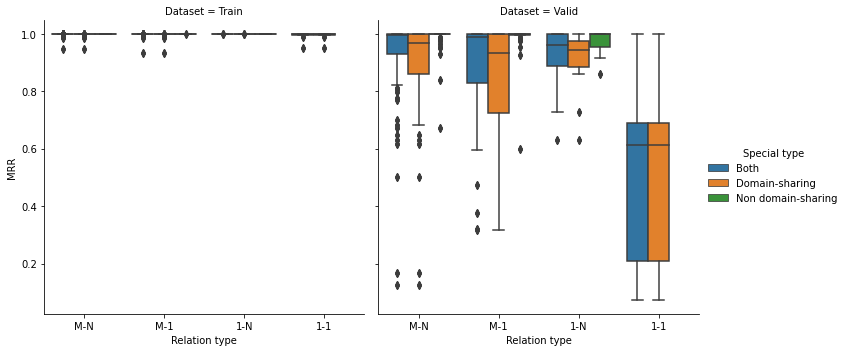

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sthg_fun = result_objects_plt.copy()
sthg_fun['type'] = sthg_fun.name_relation.map(lambda x: 'Domain-sharing' if x in list_relation_in_so else 'Non domain-sharing')
sthg_fun['eval_type'] = sthg_fun.eval_type.map(lambda x: x.capitalize())
sthg_fun_2 = sthg_fun.copy()
sthg_fun_2['type'] = 'Both'

plt.figure(figsize=(10, 20), dpi=180)
ax = sns.catplot(
    x='Relation type', y='MRR', 
    hue='Special type', col='Dataset', kind='box',
    data=pd.concat([sthg_fun_2, sthg_fun]).rename(columns={'MRR_hybrid': 'MRR', 
                                                           'relation_type': 'Relation type',
                                                           'type': 'Special type',
                                                           'eval_type': 'Dataset'}))
ax.savefig("MRR_relation_in_so_pairs (hybrid overall).png", dpi=180)

<Figure size 1800x3600 with 0 Axes>

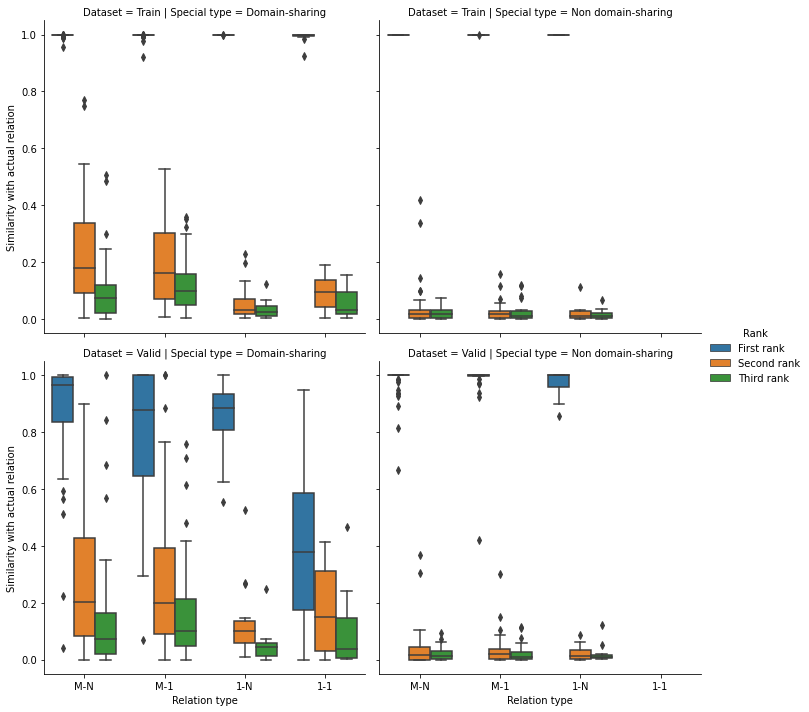

In [30]:
domain_similarity = pd.concat([result_subjects_plt, result_objects_plt])
domain_similarity = domain_similarity.groupby(['name_relation', 'relation_type', 'eval_type', 'MRR_hybrid', 'rank']).mean().reset_index()
domain_similarity['type'] = domain_similarity.name_relation.map(lambda x: 'Domain-sharing' if x in list_relation_in_so else 'Non domain-sharing')
domain_similarity['eval_type'] = domain_similarity.eval_type.map(lambda x: x.capitalize())
domain_similarity
# domain_similarity = domain_similarity.melt(id_vars=['name_relation', 'relation_type', 'eval_type', 'type', 'MRR_standard'],
#                                            value_vars=['First rank', 'Second rank', 'Third rank'], 
#                                             var_name='rank', value_name='jaccard_sim')
# domain_similarity
plt.figure(figsize=(10, 20), dpi=180)
ax = sns.catplot(x='Relation type', y='jaccard_sim', 
                 hue='Rank', row='Dataset', col='Special type',
                 kind='box', data=domain_similarity.rename(columns={'MRR_hybrid': 'MRR', 
                                                                    'relation_type': 'Relation type',
                                                                    'type': 'Special type',
                                                                    'eval_type': 'Dataset',
                                                                    'rank': 'Rank'}),
                 order=['M-N', 'M-1', '1-N', '1-1'],
                 )
ax.set(xlabel='Relation type', ylabel='Similarity with actual relation')
ax.savefig("jaccard_similarity (hybrid overall).png", dpi=180)

In [33]:
list_interesting_relations

array([], dtype=object)

In [36]:
## some examples of domain-sharing relations
type_of_relation = '1-1'
list_interesting_relations = domain_similarity[(domain_similarity.type == 'Domain-sharing') 
                  & (domain_similarity['rank'] == 'First rank')
                  # & (domain_similarity.jaccard_sim <= 0.6)
                  ].name_relation.unique()
# list_interesting_relations = ['/celebrities/celebrity/celebrity_friends./celebrities/friendship/friend']

df_std_hybrid_ranking[ df_std_hybrid_ranking.name_relation.isin(list_interesting_relations) 
                      & df_std_hybrid_ranking.relation_type.isin([type_of_relation]) 
                      & ~df_std_hybrid_ranking.so_to_p_hybrid.isin([0, 1, 2]) 
                    #   & (df_std_hybrid_ranking.name_subjects != df_std_hybrid_ranking.name_objects)
                      # & df_std_hybrid_ranking.predicted_relation_type_hybrid.isin([(type_of_relation, type_of_relation, type_of_relation)])
                      ]\
                          .set_index(['name_relation', 'relation_type', 
                                      'predicted_relation_hybrid', 'predicted_relation_type_hybrid'])

,,,,name_subjects,name_objects,eval_type,so_to_p_hybrid,MRR_hybrid
name_relation,relation_type,predicted_relation_hybrid,predicted_relation_type_hybrid,,,,,
/dataworld/gardening_hint/split_to,1-1,"(/military/military_combatant/military_conflicts./military/military_combatant_group/combatants, /music/performance_role/track_performances./music/track_contribution/role, /location/statistical_region/places_exported_to./location/imports_and_exports/exported_to)","(M-N, M-N, M-N)",United States of America,United States of America,train,6,0.950096
/location/country/capital,1-1,"(/location/location/adjoin_s./location/adjoining_relationship/adjoins, /military/military_combatant/military_conflicts./military/military_combatant_group/combatants, /music/performance_role/regular_performances./music/group_membership/role)","(M-N, M-N, M-N)",Singapore,Singapore,train,3,0.994718
/dataworld/gardening_hint/split_to,1-1,"(/music/performance_role/regular_performances./music/group_membership/role, /music/performance_role/track_performances./music/track_contribution/role, /music/performance_role/guest_performances./music/recording_contribution/performance_role)","(M-N, M-N, M-N)",Keyboard,Keyboard,train,3,0.950096
/base/aareas/schema/administrative_area/capital,1-1,"(/dataworld/gardening_hint/split_to, /location/hud_county_place/place, /education/educational_institution/campuses)","(1-1, 1-1, 1-1)",Paris,Paris,train,4,0.994161
/people/person/spouse_s./people/marriage/spouse,1-1,"(/award/award_nominee/award_nominations./award/award_nomination/award_nominee, /location/location/adjoin_s./location/adjoining_relationship/adjoins, /location/hud_county_place/place)","(M-N, M-N, 1-1)",Mani Ratnam,Suhasini Mani Ratnam,valid,145,0.105845
/organization/organization_founder/organizations_founded,1-1,"(/people/person/employment_history./business/employment_tenure/company, /location/hud_county_place/county, /organization/organization/child./organization/organization_relationship/child)","(M-1, M-1, 1-N)",Cedric Gibbons,Academy of Motion Picture Arts and Sciences,valid,3,0.621252
/location/country/capital,1-1,"(/location/location/contains, /music/performance_role/regular_performances./music/group_membership/role, /music/performance_role/track_performances./music/track_contribution/role)","(M-N, M-N, M-N)",Kingdom of Scotland,Dunfermline,valid,39,0.349376
/people/person/sibling_s./people/sibling_relationship/sibling,1-1,"(/base/popstra/celebrity/friendship./base/popstra/friendship/participant, /music/performance_role/track_performances./music/track_contribution/role, /music/performance_role/regular_performances./music/group_membership/role)","(M-N, M-N, M-N)",Joaquin Phoenix,River Phoenix,valid,52,0.229964
/location/hud_county_place/place,1-1,"(/award/award_nominee/award_nominations./award/award_nomination/award_nominee, /education/educational_institution/campuses, /education/educational_institution_campus/educational_institution)","(M-N, 1-1, 1-1)",Springfield (United States of America) #7,Springfield (United States of America) #7,valid,4,0.697804
